In [1]:
# allow to import modules from the project root directory
import sys
import os

# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
from src.data import fetch_features

X_train, y_train, X_test = fetch_features(name="features_target_train_test_not_transform",version='v1.0')
len(X_train), len(X_test), len(y_train)

c:\Users\Alexey\IU\Fall 2024\Practical Machine Learning and Deep Learning\Project\PMDL-DisasterTweets\venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


PyTorch version 2.2.2 available.


(7613, 3263, 7613)

In [3]:
os.chdir("..")
os.getcwd()

'c:\\Users\\Alexey\\IU\\Fall 2024\\Practical Machine Learning and Deep Learning\\Project\\PMDL-DisasterTweets'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data import read_datastore
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, RocCurveDisplay, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay


def print_metrics(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(model)
    print(classification_report(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    fig, axs = plt.subplots(1, 2)
    roc_auc_curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=f'{type(model).__name__}')
    roc_auc_curve.plot(axs[0])
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pre_rec_curve = PrecisionRecallDisplay(precision=precision, recall=recall)
    pre_rec_curve.plot(axs[1])
    fig.tight_layout()
    plt.show()
    return model

def prepare_submission(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    target = model.predict(X_test)
    _, test, _ = read_datastore()
    test['target'] = pd.Series(data=target)
    test.drop(columns=['keyword', 'location', 'text']).to_csv('submission.csv', index=False)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       874
           1       0.98      0.93      0.96       649

    accuracy                           0.97      1523
   macro avg       0.97      0.96      0.96      1523
weighted avg       0.97      0.97      0.97      1523



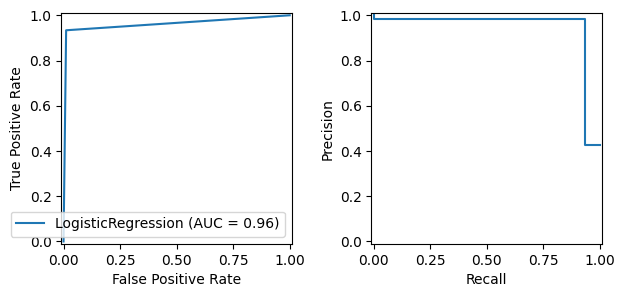

BernoulliNB()
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       874
           1       0.98      0.93      0.96       649

    accuracy                           0.97      1523
   macro avg       0.97      0.96      0.96      1523
weighted avg       0.97      0.97      0.97      1523



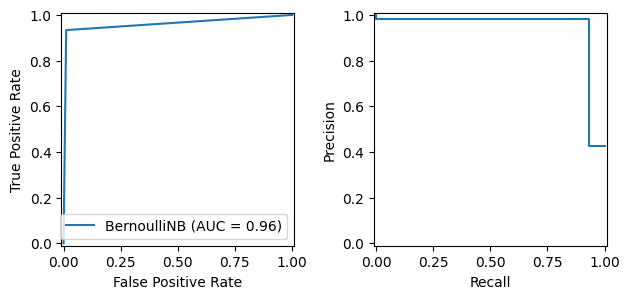

SVC()
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       874
           1       0.98      0.93      0.96       649

    accuracy                           0.97      1523
   macro avg       0.97      0.96      0.96      1523
weighted avg       0.97      0.97      0.97      1523



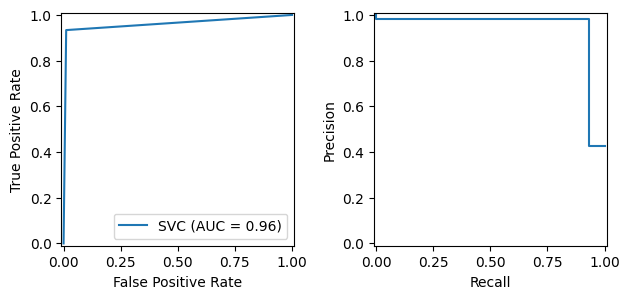

SVC(kernel='linear')
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       874
           1       0.98      0.93      0.96       649

    accuracy                           0.97      1523
   macro avg       0.97      0.96      0.96      1523
weighted avg       0.97      0.97      0.97      1523



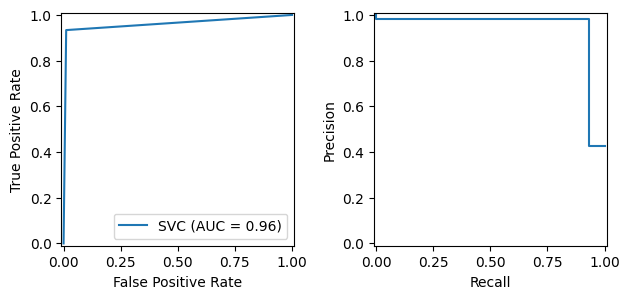

RandomForestClassifier(max_depth=3, random_state=0)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       874
           1       0.98      0.93      0.96       649

    accuracy                           0.97      1523
   macro avg       0.97      0.96      0.96      1523
weighted avg       0.97      0.97      0.97      1523



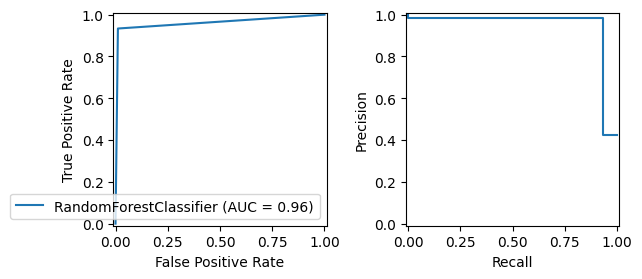

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       874
           1       0.98      0.93      0.95       649

    accuracy                           0.96      1523
   macro avg       0.96      0.96      0.96      1523
weighted avg       0.96      0.96      0.96      1523



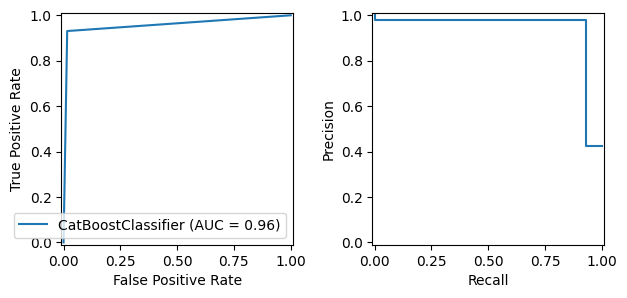

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 16, 1),
              max_iter=1000, random_state=0)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       874
           1       0.98      0.93      0.96       649

    accuracy                           0.97      1523
   macro avg       0.97      0.96      0.96      1523
weighted avg       0.97      0.97      0.97      1523



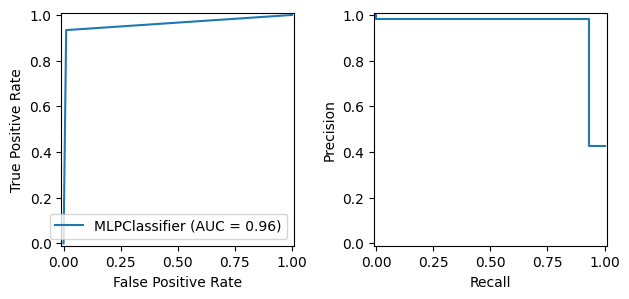

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 16, 1),
              max_iter=1000, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

print_metrics(X_train, y_train, LogisticRegression())
print_metrics(X_train, y_train, BernoulliNB())
print_metrics(X_train, y_train, SVC(kernel='rbf'))
print_metrics(X_train, y_train, SVC(kernel='linear'))
print_metrics(X_train, y_train, RandomForestClassifier(max_depth=3, random_state=0))
print_metrics(X_train, y_train, CatBoostClassifier(task_type="GPU", verbose=0))
print_metrics(X_train, y_train, MLPClassifier(hidden_layer_sizes=(128,16,1,), max_iter=1000, early_stopping=True, random_state=0))
# prepare_submission(X_train, y_train, X_test, MLPClassifier(hidden_layer_sizes=(128,16,1,), max_iter=1000, early_stopping=True, random_state=0))

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [7]:
X_train_t = torch.tensor(X_train, dtype=torch.float)
y_train_t = torch.tensor(y_train, dtype=torch.float)
train_dataset = TensorDataset(X_train_t, y_train_t)
train_dataloader = DataLoader(train_dataset, batch_size=128)

In [8]:
class LSTMModel(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, num_layers, tagset_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers)
        self.linear = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        lstm_out, _ = self.lstm(sentence)
        preds = self.linear(lstm_out.view(len(sentence), -1))
        return preds

In [9]:
class biLSTMModel(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, num_layers, tagset_size):
        super(biLSTMModel, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, bidirectional=True)
        self.linear = nn.Linear(hidden_dim * 2, tagset_size)

    def forward(self, sentence):
        lstm_out, _ = self.lstm(sentence)
        preds = self.linear(lstm_out.view(len(sentence), -1))
        return preds

In [10]:
model = LSTMModel(384, 60, 1, 1)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [11]:
max_epochs = 10
model.train()
for epoch in range(max_epochs):
    epoch_correct = 0
    epoch_all = 0
    avg_loss = 0
    count = 0
    for x_batch, y_batch in train_dataloader:
        optimizer.zero_grad()
        outp = model(x_batch)
        loss = criterion(outp, y_batch.reshape(-1, 1))
        avg_loss += loss.item()
        count += 1
        loss.backward()
        optimizer.step()
        preds = (F.sigmoid(outp.view(-1)) > 0.5)
        correct = (preds == y_batch).sum()
        all = y_batch.size(0)
        epoch_correct += correct.item()
        epoch_all += all
    print(f"Epoch: {epoch+1}")
    print(f"Accuracy: {epoch_correct/epoch_all}. Loss: {avg_loss / count}")

Epoch: 1
Accuracy: 0.7212662550899777. Loss: 0.5967634533842404
Epoch: 2
Accuracy: 0.8419808222776829. Loss: 0.41414785707990326
Epoch: 3
Accuracy: 0.9642716406147379. Loss: 0.22192914187908172
Epoch: 4
Accuracy: 0.9658478917640877. Loss: 0.16017299592494966
Epoch: 5
Accuracy: 0.9658478917640877. Loss: 0.15060442139705021
Epoch: 6
Accuracy: 0.9658478917640877. Loss: 0.148657794483006
Epoch: 7
Accuracy: 0.9658478917640877. Loss: 0.14791896423945824
Epoch: 8
Accuracy: 0.9658478917640877. Loss: 0.14754320836315551
Epoch: 9
Accuracy: 0.9658478917640877. Loss: 0.14729866621394952
Epoch: 10
Accuracy: 0.9658478917640877. Loss: 0.1471174337590734


In [12]:
X_test_t = torch.tensor(X_test, dtype=torch.float)
test_dataset = TensorDataset(X_test_t)
test_dataloader = DataLoader(test_dataset, batch_size=128)

In [13]:
with torch.no_grad():
    preds = []
    for x_batch in test_dataloader:
        model.eval()
        outp = model(x_batch[0])
        preds += [1 if pred > 0.5 else 0 for pred in F.sigmoid(outp.view(-1))]

In [14]:
# Preparing submisssion

# _, test, _ = read_datastore()
# test['target'] = pd.Series(data=preds)
# test.drop(columns=['keyword', 'location', 'text']).to_csv('submission.csv', index=False)